#Prepare a classification model using Naive Bayes for salary data

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [7]:
# Read the csv file
train_data = pd.read_csv('SalaryData_Train.csv')
# Display the first few rows of the dataset
train_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [9]:
# Read the csv file
test_data = pd.read_csv('SalaryData_Test.csv')
# Display the first few rows of the dataset
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#combined data

In [11]:
# Read the csv files
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

# Combine the data
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Display the first few rows of the combined dataset
combined_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [13]:
# Summary statistics of the numerical columns
combined_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
combined_data.describe(include=object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,45221,45221,45221,45221,45221,45221,45221,45221,45221
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33306,14783,21055,6020,18666,38902,30527,41292,34013


In [15]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [16]:
combined_data.shape

(45221, 14)

# To deal with duplicated values

In [17]:
#finding duplicates
combined_data.duplicated().sum()

5982

In [18]:
#Print the duplicated values
combined_data[combined_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [19]:
#Drop Duplicated records
combined_data.drop_duplicates(inplace=True)

In [20]:
combined_data.duplicated().sum()

0

In [21]:
#finding missing values
combined_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
cat_cols = combined_data.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [25]:
oe = OrdinalEncoder()

combined_data[cat_cols] = oe.fit_transform(combined_data[cat_cols])

In [26]:
combined_data[cat_cols]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,5.0,9.0,4.0,0.0,1.0,4.0,1.0,37.0,0.0
1,4.0,9.0,2.0,3.0,0.0,4.0,1.0,37.0,0.0
2,2.0,11.0,0.0,5.0,1.0,4.0,1.0,37.0,0.0
3,2.0,1.0,2.0,5.0,0.0,2.0,1.0,37.0,0.0
4,2.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
45215,1.0,12.0,0.0,7.0,1.0,4.0,1.0,37.0,0.0
45216,2.0,9.0,4.0,9.0,3.0,4.0,1.0,37.0,0.0
45217,2.0,9.0,0.0,9.0,1.0,4.0,0.0,37.0,0.0
45219,2.0,9.0,0.0,0.0,3.0,1.0,1.0,37.0,0.0


In [75]:
combined_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,2.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0,0.0
1,50.0,2.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,32.5,37.0,0.0
2,38.0,2.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0,0.0
3,53.0,2.0,4.5,7.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0,0.0
4,28.0,2.0,9.0,13.0,2.0,9.0,5.0,4.0,0.0,0.0,0.0,40.0,37.0,0.0


In [28]:
combined_data.dtypes

age                int64
workclass        float64
education        float64
educationno        int64
maritalstatus    float64
occupation       float64
relationship     float64
race             float64
sex              float64
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native           float64
Salary           float64
dtype: object

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

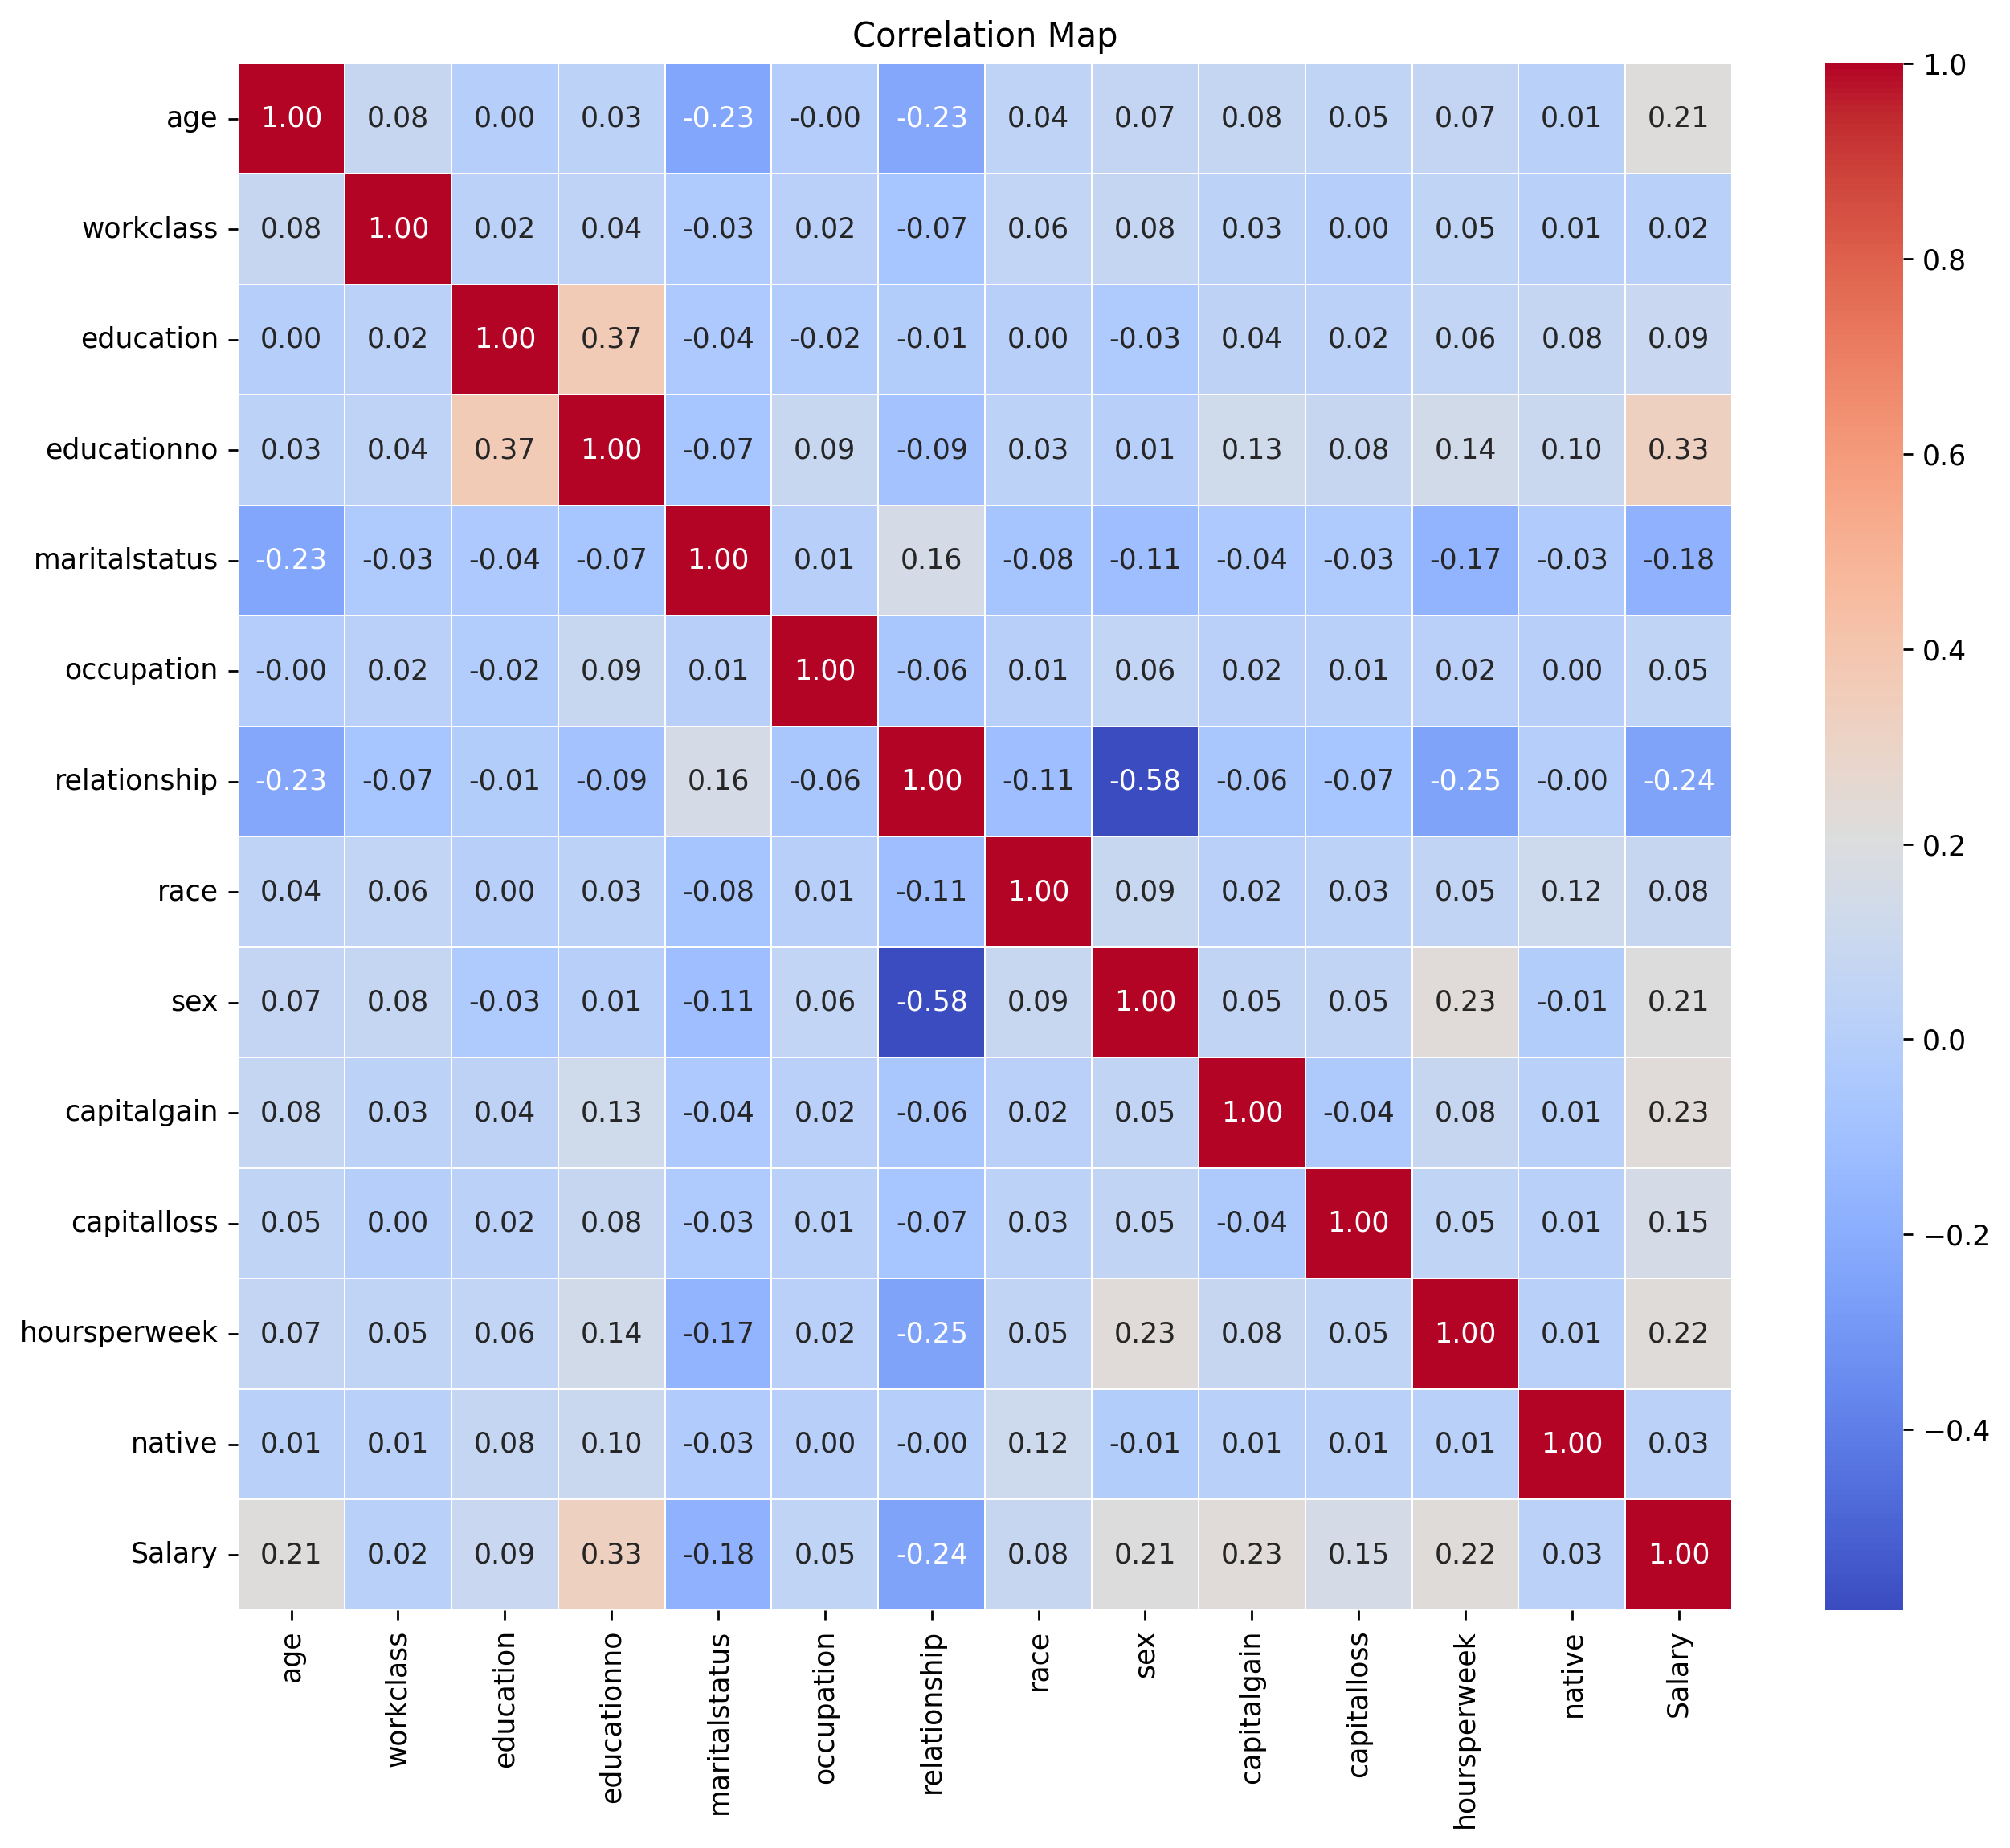

In [29]:
# Assuming df is your DataFrame containing numerical columns
s = combined_data.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

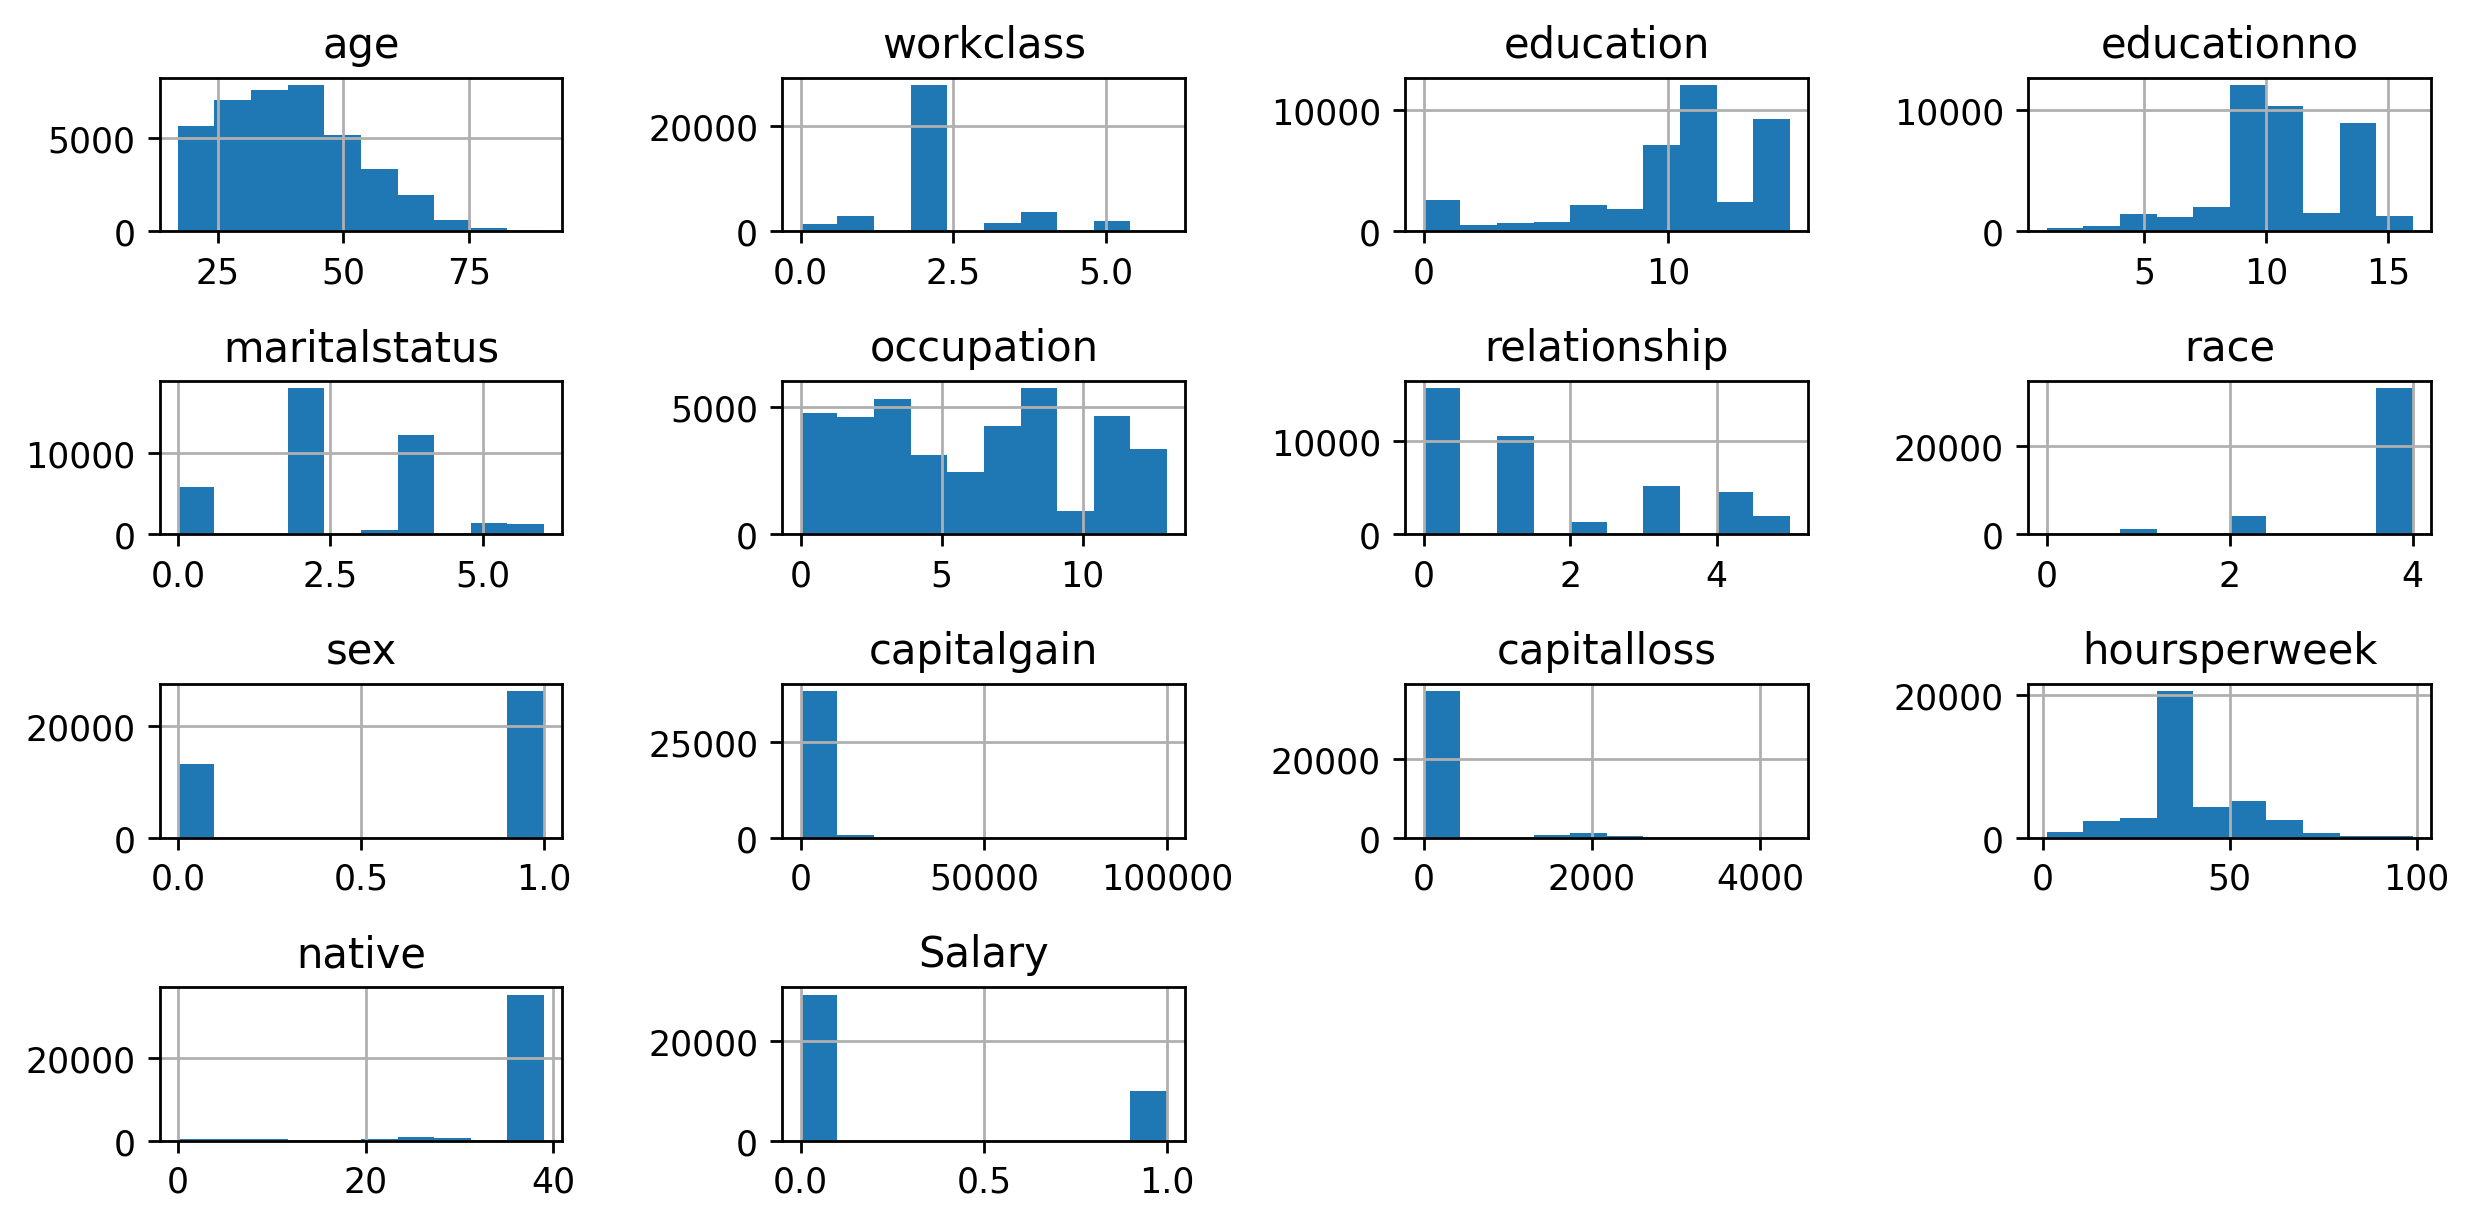

In [30]:
combined_data.hist()
plt.tight_layout()

In [31]:
sns.pairplot(combined_data)

Output hidden; open in https://colab.research.google.com to view.

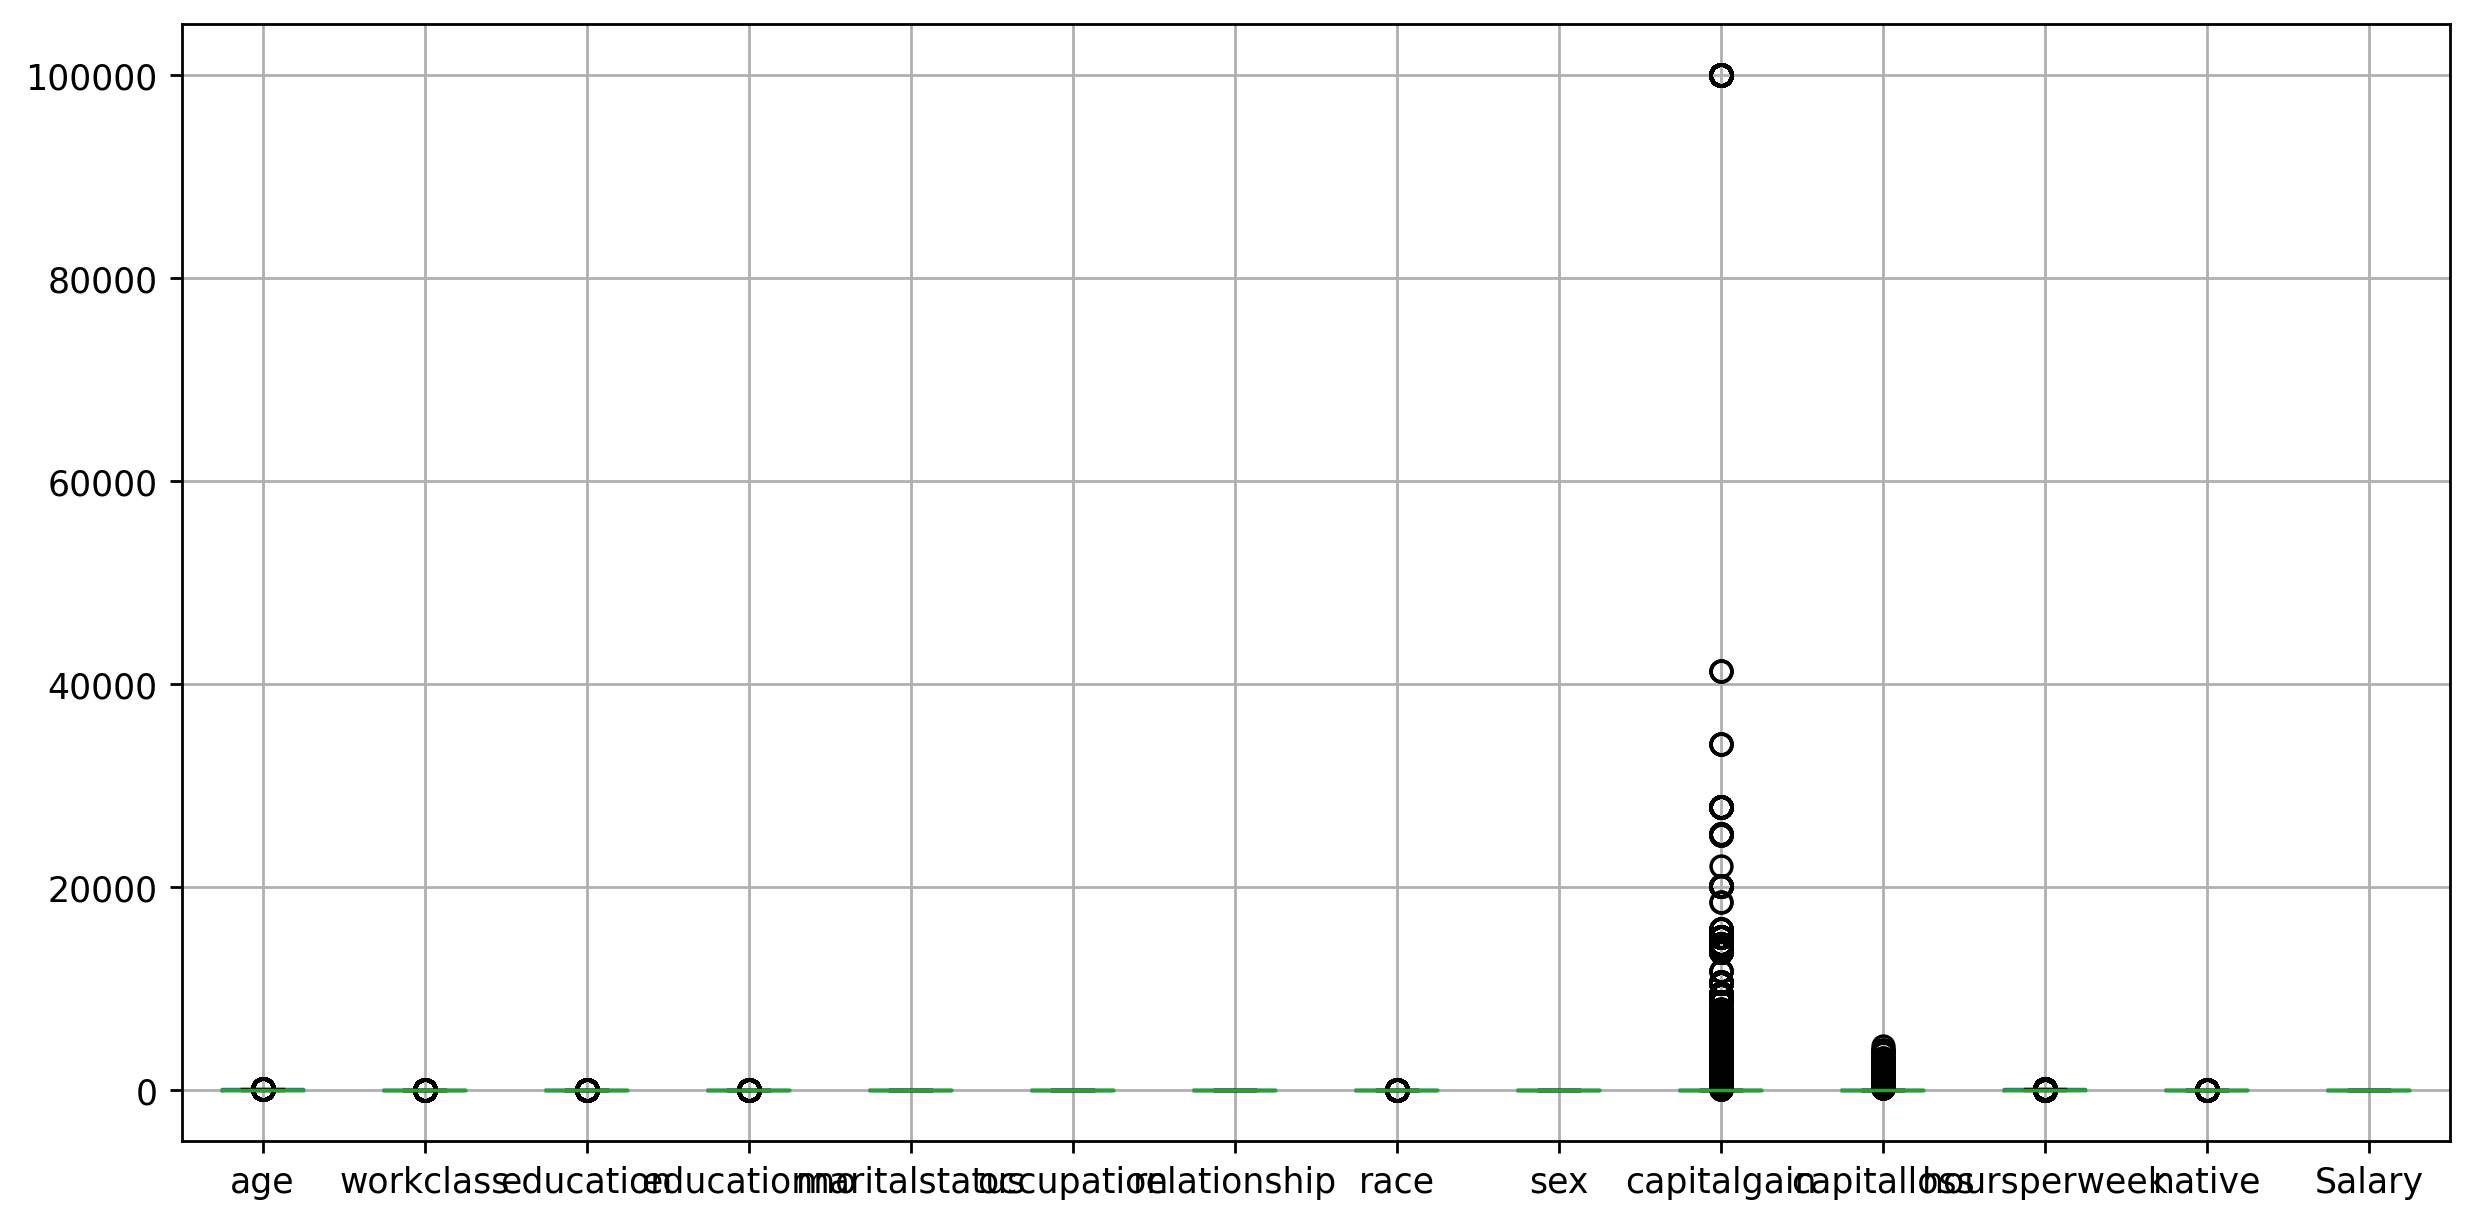

In [32]:
combined_data.boxplot()
plt.tight_layout()

# for delete outliers

In [33]:
combined_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [37]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['age', 'workclass', 'education', 'educationno',
          'maritalstatus','race', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']:
    lw, uw = calculate_whisker(combined_data[i])
    combined_data[i] = np.where(combined_data[i] < lw, lw, combined_data[i])
    combined_data[i] = np.where(combined_data[i] > uw, uw, combined_data[i])

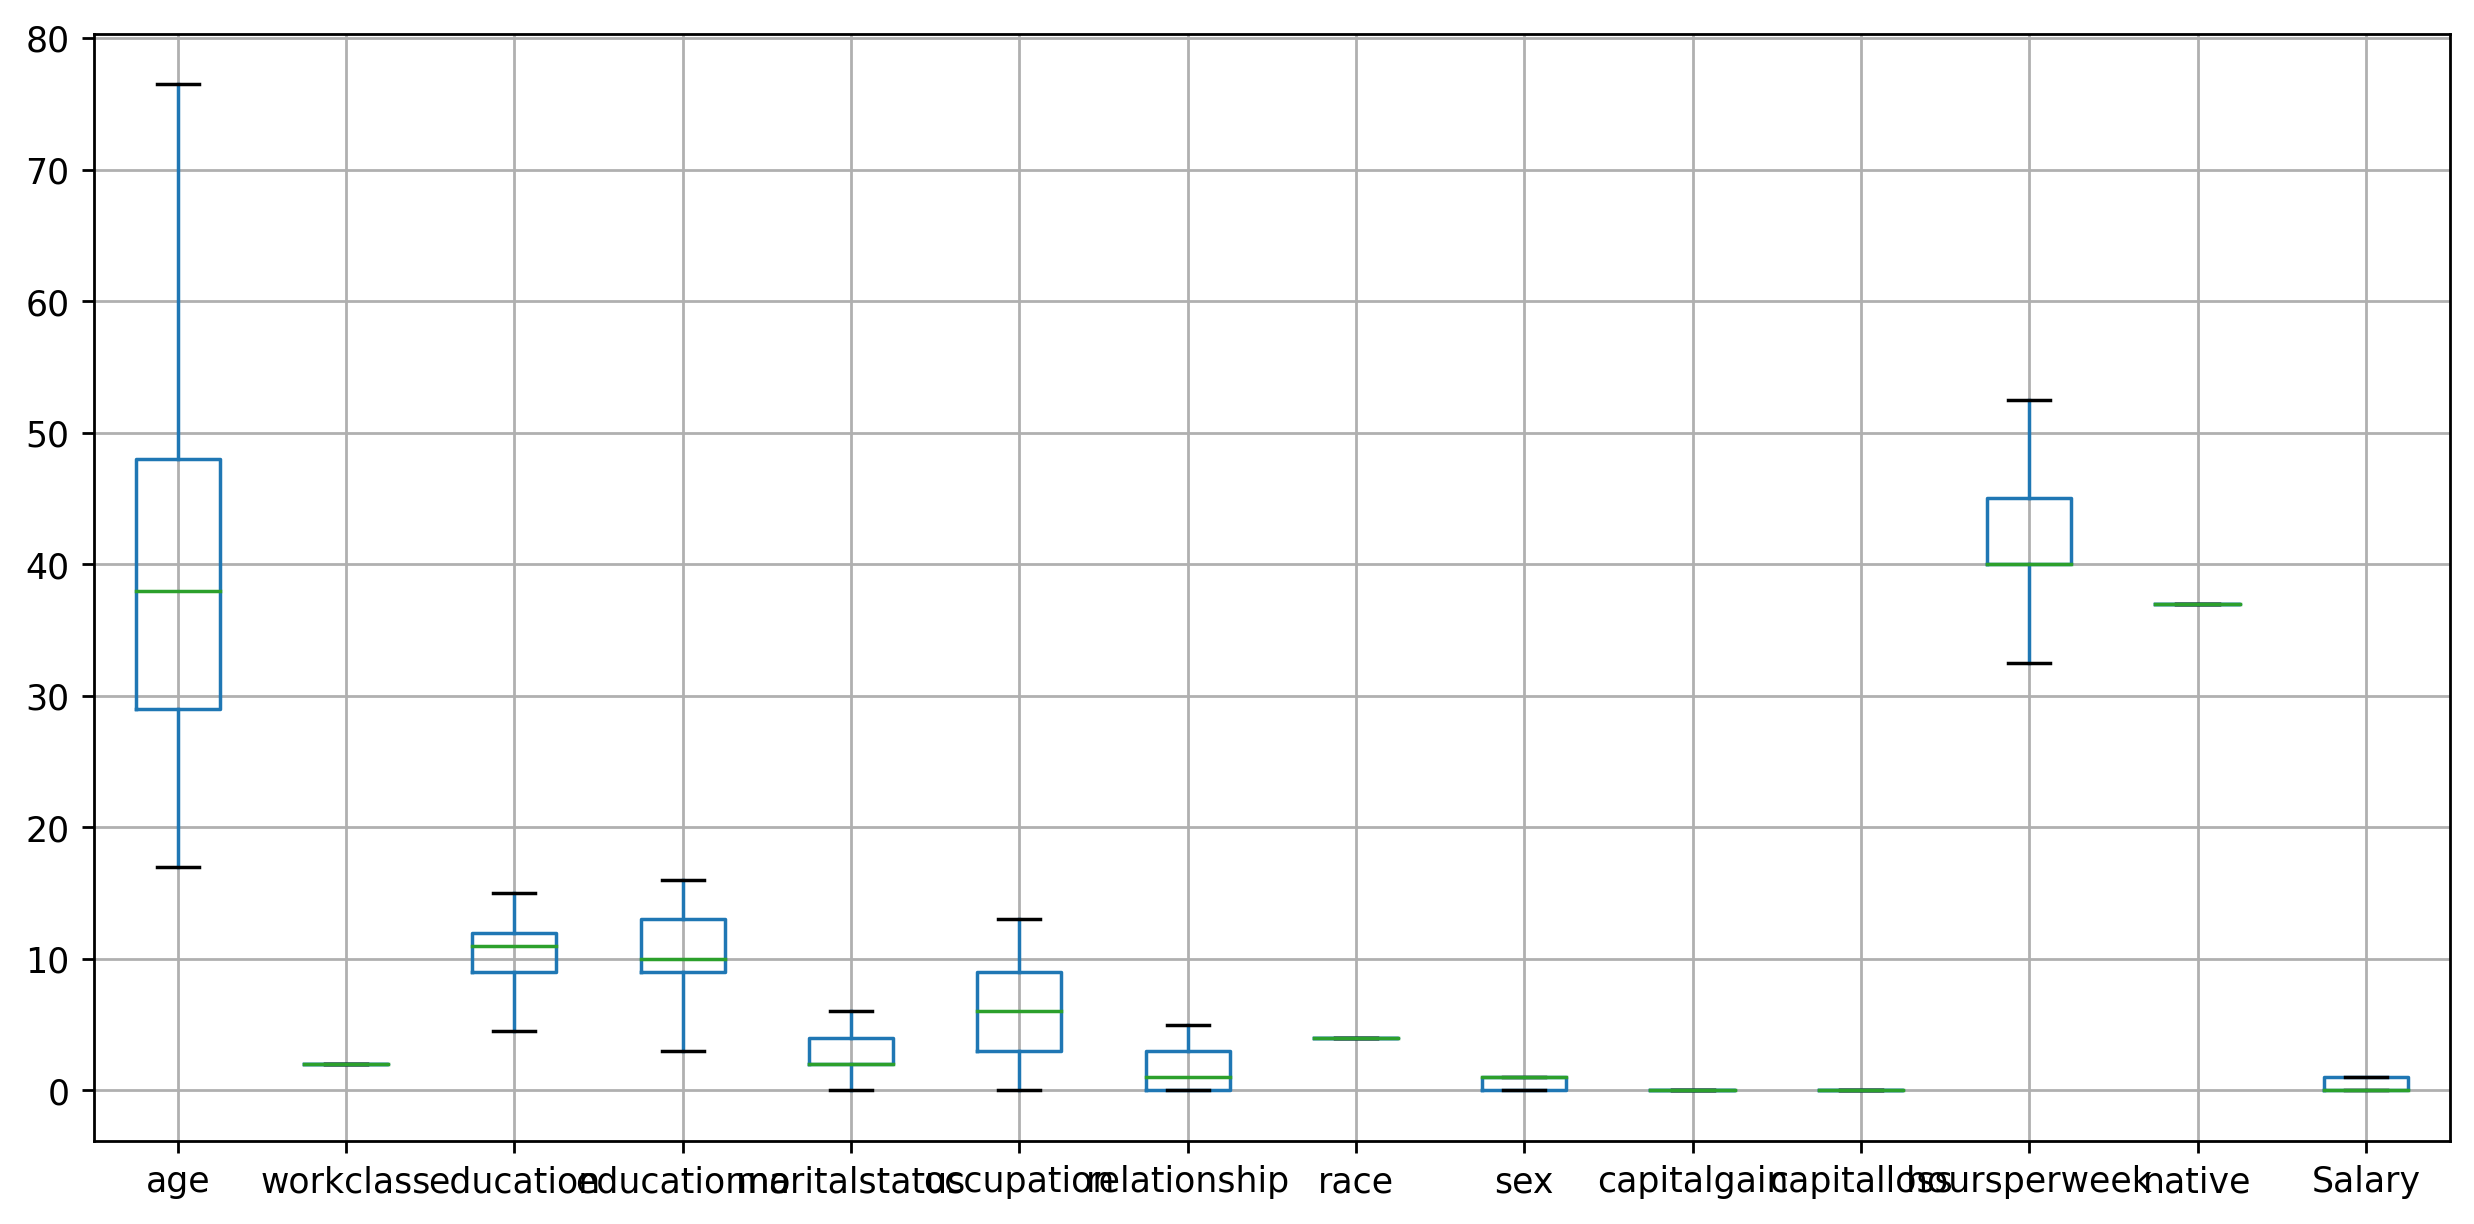

In [38]:
combined_data.boxplot()
plt.tight_layout()

#feature selection

# PPS score

In [ ]:
pip install ppscore

In [49]:
import ppscore as ps

In [51]:
feature_sel = ps.matrix(combined_data)

In [52]:
feature_sel[feature_sel['y'] == 'Salary']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
13,age,Salary,0.0,regression,True,mean absolute error,0.2564,0.348092,DecisionTreeRegressor()
27,workclass,Salary,0.0,regression,True,mean absolute error,0.2564,0.381369,DecisionTreeRegressor()
41,education,Salary,0.0,regression,True,mean absolute error,0.2564,0.329099,DecisionTreeRegressor()
55,educationno,Salary,0.0,regression,True,mean absolute error,0.2564,0.329209,DecisionTreeRegressor()
69,maritalstatus,Salary,0.0,regression,True,mean absolute error,0.2564,0.309251,DecisionTreeRegressor()
83,occupation,Salary,0.0,regression,True,mean absolute error,0.2564,0.334502,DecisionTreeRegressor()
97,relationship,Salary,0.0,regression,True,mean absolute error,0.2564,0.305565,DecisionTreeRegressor()
111,race,Salary,0.0,regression,True,mean absolute error,0.2564,0.381369,DecisionTreeRegressor()
125,sex,Salary,0.0,regression,True,mean absolute error,0.2564,0.368536,DecisionTreeRegressor()
139,capitalgain,Salary,0.0,regression,True,mean absolute error,0.2564,0.381369,DecisionTreeRegressor()


# Chi square for feature selection

In [53]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='rainbow')

In [ ]:
#Define x and y

In [56]:
x = combined_data.iloc[:,:-1]
y = combined_data['Salary']

In [57]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x7d0cb4c31c60>)

In [58]:
test.scores_

array([8.12776608e+03, 9.04516799e-28, 2.08717115e+02, 2.88993785e+03,
       1.19219738e+03, 2.58144692e+02, 4.24482226e+03, 1.80903360e-27,
       5.95746207e+02,            nan,            nan, 2.56043904e+03,
       0.00000000e+00])

In [59]:
x.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [60]:
pd.DataFrame({
    'Features' : x.columns,
    'Test' : test.scores_
})

,Features,Test
0,age,8.127766e+03
1,workclass,9.045168e-28
2,education,2.087171e+02
3,educationno,2.889938e+03
4,maritalstatus,1.192197e+03
5,occupation,2.581447e+02
6,relationship,4.244822e+03
7,race,1.809034e-27
8,sex,5.957462e+02
9,capitalgain,NaN


In [61]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39.0,2.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0
1,50.0,2.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,32.5,37.0
2,38.0,2.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0
3,53.0,2.0,4.5,7.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0
4,28.0,2.0,9.0,13.0,2.0,9.0,5.0,4.0,0.0,0.0,0.0,40.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48.0,2.0,12.0,14.0,0.0,7.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0
45216,33.0,2.0,9.0,13.0,4.0,9.0,3.0,4.0,1.0,0.0,0.0,40.0,37.0
45217,39.0,2.0,9.0,13.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,36.0,37.0
45219,44.0,2.0,9.0,13.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,40.0,37.0


In [62]:
pd.DataFrame(test.scores_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8127.766081,9.045168e-28,208.717115,2889.937847,1192.19738,258.144692,4244.822263,1.809034e-27,595.746207,NaN,NaN,2560.439043,0.0


In [63]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8127.766081,9.045168e-28,208.717115,2889.937847,1192.19738,258.144692,4244.822263,1.809034e-27,595.746207,NaN,NaN,2560.439043,0.0


# Recursive Feature Elimination

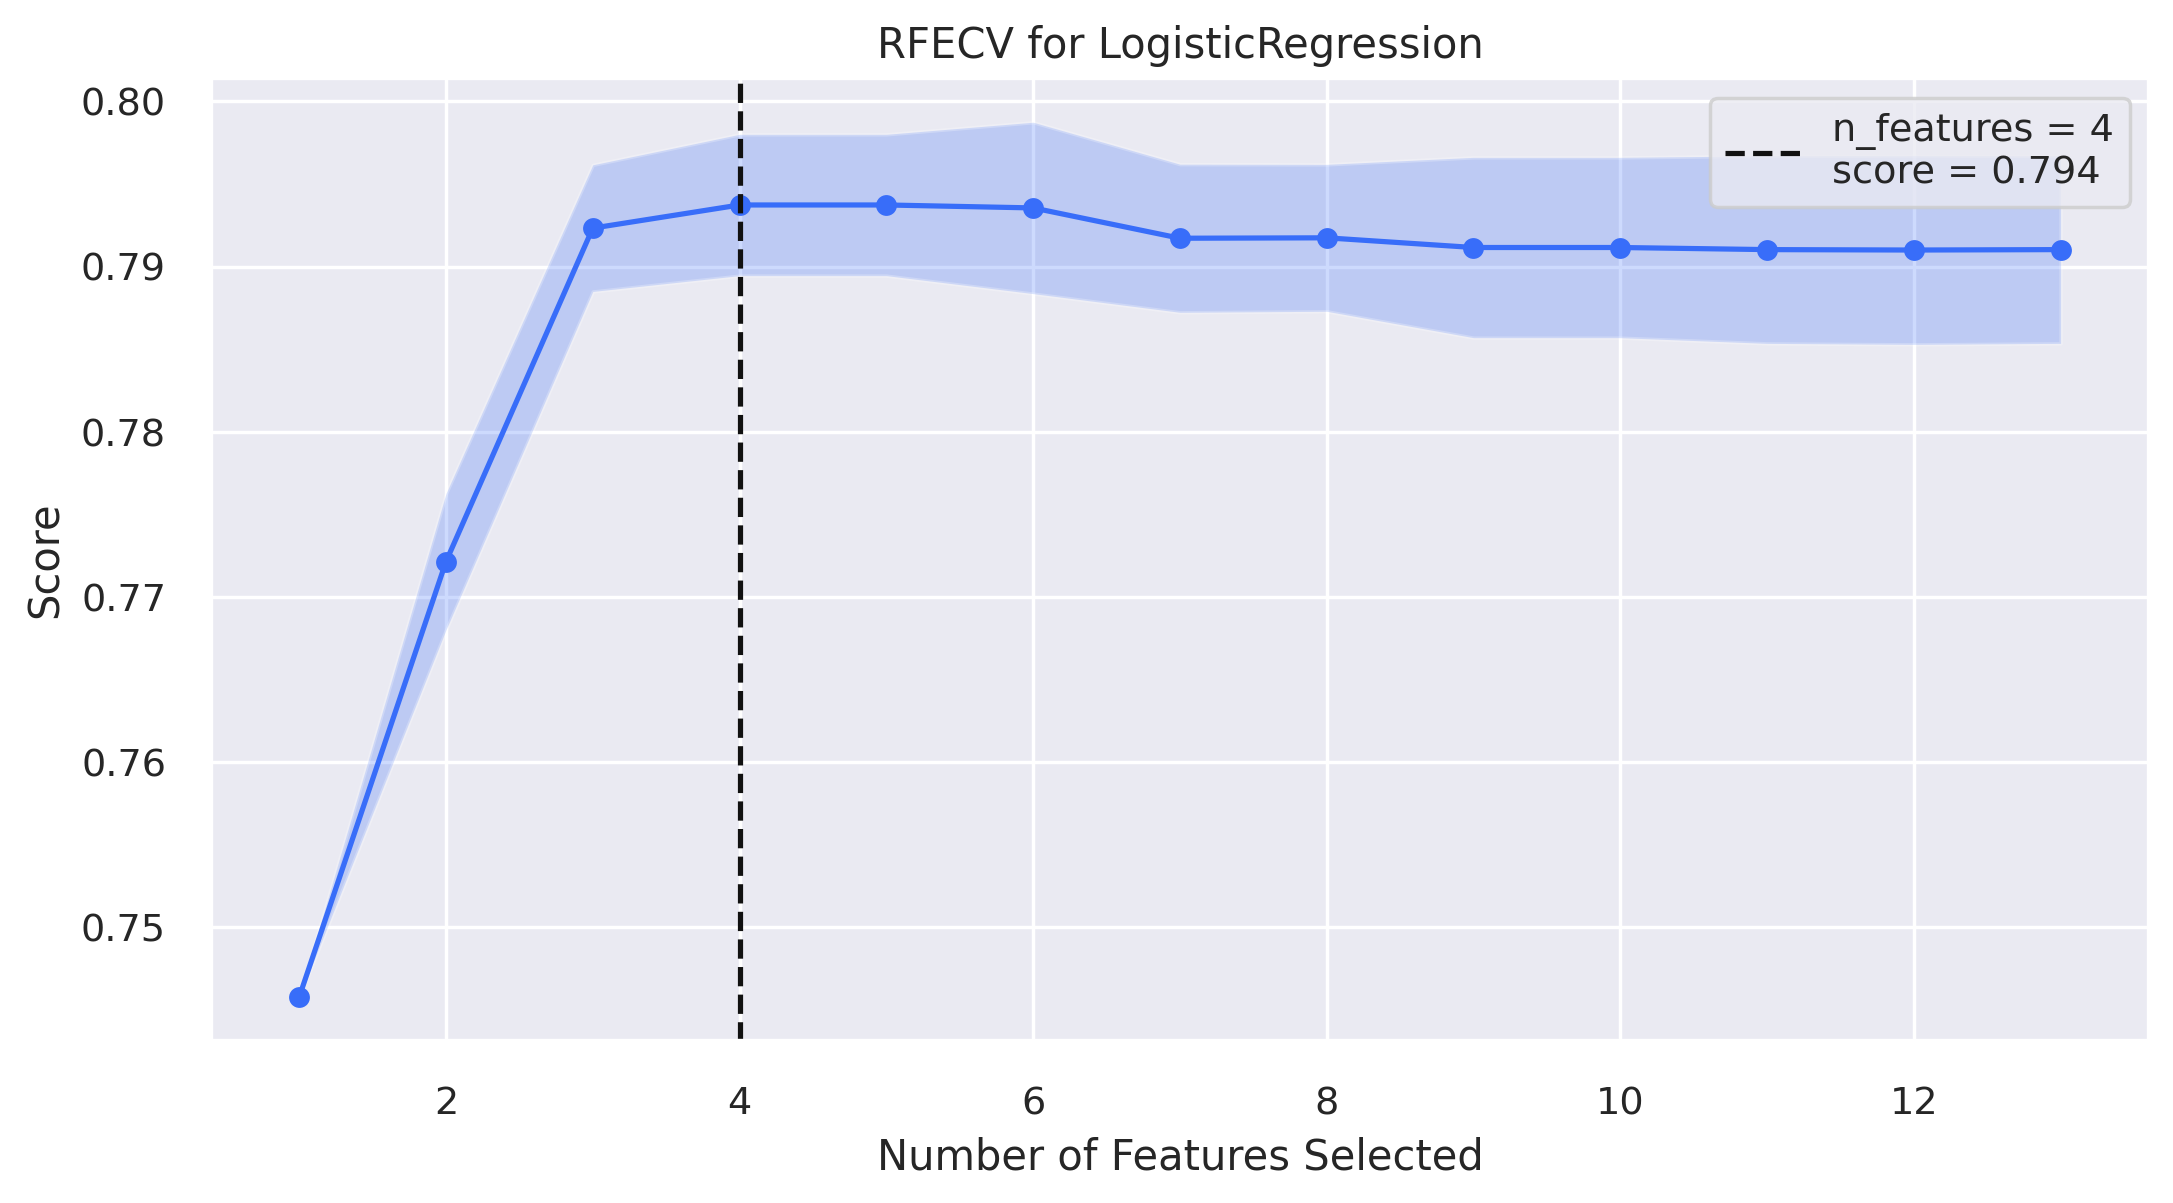

In [64]:
rfe = rfecv(LogisticRegression(),x,y)

In [65]:
rfe.ranking_

array([ 4,  7,  6,  1,  1,  8,  1,  5,  1, 10,  9,  3,  2])

In [66]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [67]:
rfe_Sel

,Ranking,Features
0,4,age
1,7,workclass
2,6,education
3,1,educationno
4,1,maritalstatus
5,8,occupation
6,1,relationship
7,5,race
8,1,sex
9,10,capitalgain


In [68]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
3,1,educationno
4,1,maritalstatus
6,1,relationship
8,1,sex


# Tree Based method

In [69]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [70]:
dt.feature_importances_

array([0.25874282, 0.        , 0.02670443, 0.17353524, 0.02669286,
       0.10050547, 0.27870088, 0.        , 0.00760873, 0.        ,
       0.        , 0.12750957, 0.        ])

In [71]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [72]:
ig_sel

,IG,Features
0,0.258743,age
1,0.000000,workclass
2,0.026704,education
3,0.173535,educationno
4,0.026693,maritalstatus
5,0.100505,occupation
6,0.278701,relationship
7,0.000000,race
8,0.007609,sex
9,0.000000,capitalgain


In [73]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
6,0.278701,relationship
0,0.258743,age
3,0.173535,educationno
11,0.127510,hoursperweek
5,0.100505,occupation
2,0.026704,education
4,0.026693,maritalstatus
8,0.007609,sex
1,0.000000,workclass
7,0.000000,race


#model building

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
# Assuming 'combined_data' is your combined dataset
# Split the data into train and test sets
train_set, test_set = train_test_split(combined_data, test_size=0.2, random_state=42)

In [82]:
# Features and target variable for training set
X_train = train_set[['age', 'educationno', 'relationship', 'sex', 'hoursperweek','maritalstatus']]
y_train = train_set['Salary']

# Features and target variable for test set
X_test = test_set[['age', 'educationno', 'relationship', 'sex', 'hoursperweek','maritalstatus']]
y_test = test_set['Salary']

In [83]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

In [84]:
# Train the model
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [86]:
# Make predictions on the training set
y_train_pred = naive_bayes_model.predict(X_train)
y_train_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [88]:
# Make predictions on the test set
y_test_pred = naive_bayes_model.predict(X_test)
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
# Make predictions on the test set
y_test_pred = naive_bayes_model.predict(X_test)
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training Confusion Matrix:\n{train_conf_matrix}')
print(f'Training Classification Report:\n{train_classification_rep}')

Training Accuracy: 0.7887611098722563
Training Confusion Matrix:
[[19322  4058]
 [ 2573  5438]]
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     23380
         1.0       0.57      0.68      0.62      8011

    accuracy                           0.79     31391
   macro avg       0.73      0.75      0.74     31391
weighted avg       0.80      0.79      0.79     31391



In [91]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Confusion Matrix:\n{test_conf_matrix}')
print(f'Testing Classification Report:\n{test_classification_rep}')

Testing Accuracy: 0.7878440366972477
Testing Confusion Matrix:
[[4836 1048]
 [ 617 1347]]
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      5884
         1.0       0.56      0.69      0.62      1964

    accuracy                           0.79      7848
   macro avg       0.72      0.75      0.74      7848
weighted avg       0.81      0.79      0.79      7848



In [93]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation (let's say k=5 for this example)
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.7920051  0.78623766 0.78544122 0.79117553 0.78910481]


In [94]:
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

Mean Cross-Validation Score: 0.788792863807061
Standard Deviation of Cross-Validation Scores: 0.0026021317596892227


In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_test_pred)

# Print the AUC score
print(f'AUC Score: {auc_score}')


AUC Score: 0.7538675423427266


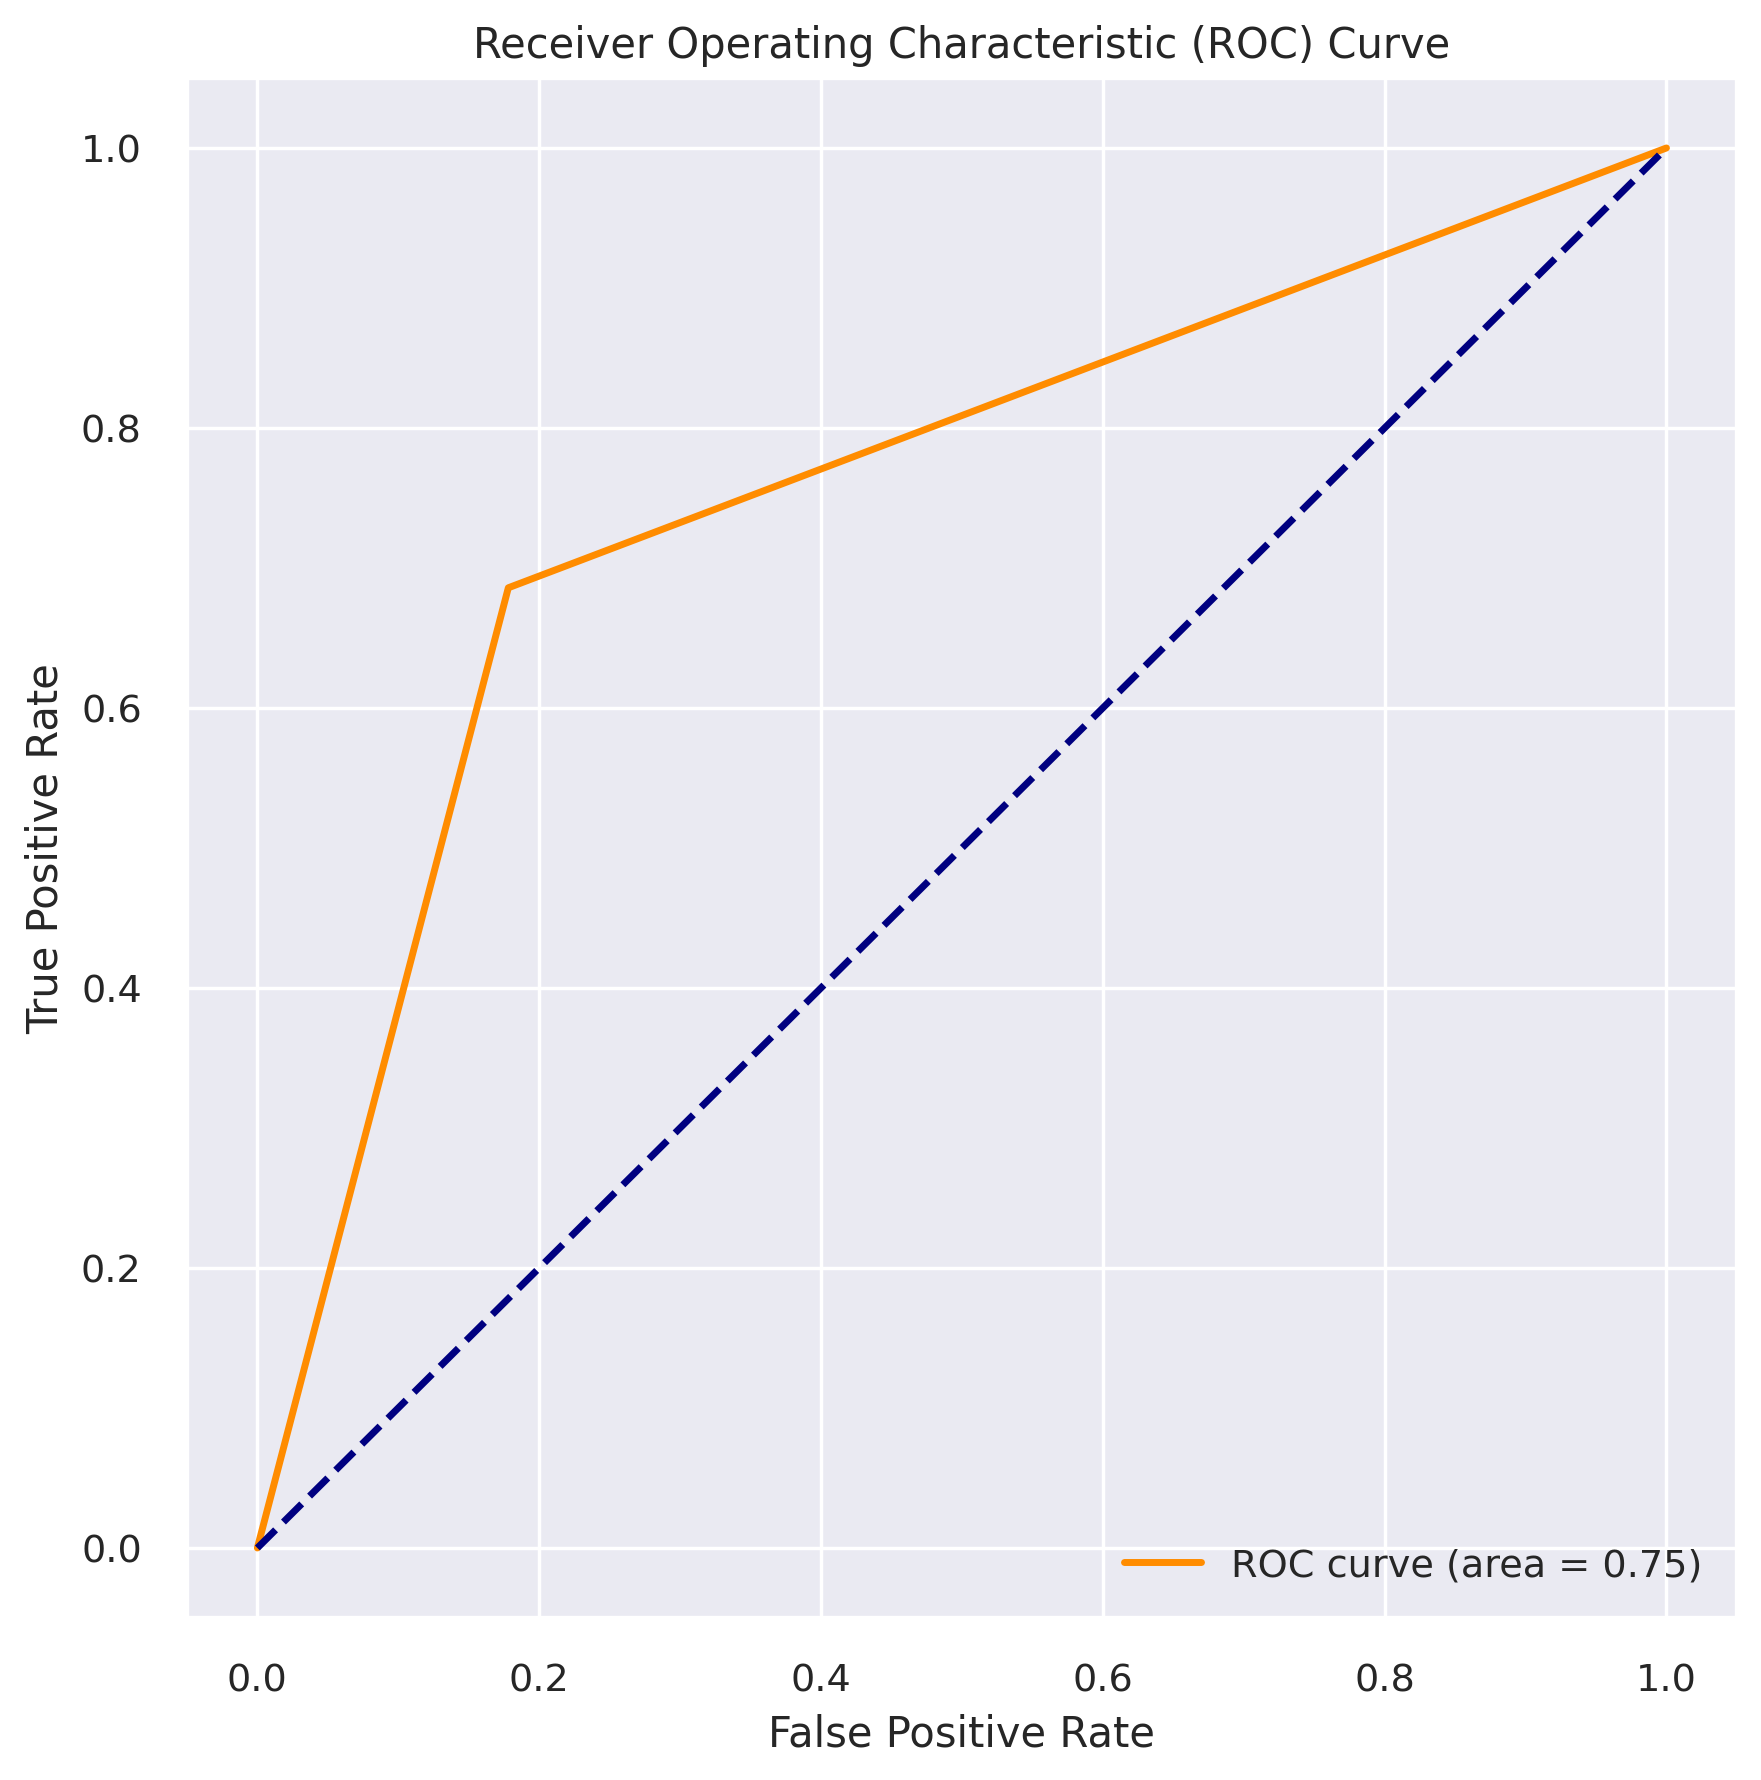

In [99]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()